# **Caso 1. Modelo Propensity**

## **Importaciones**

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Ignorar advertencias innecesarias
import warnings

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Importar métricas y validación cruzada
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve
)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, roc_auc_score, 
    confusion_matrix, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import product
# Ignorar advertencias innecesarias
import warnings
import joblib

## **Tipos de datos**

In [120]:
data = pd.read_csv("data/raw/IA_PROPENSITY_TRAIN.csv", index_col=0)
data.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58049 entries, CLI1 to CLI58048
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         58049 non-null  object
 1   TIPO_CARROCERIA  58049 non-null  object
 2   COMBUSTIBLE      58049 non-null  object
 3   Potencia         58049 non-null  object
 4   TRANS            58049 non-null  object
 5   FORMA_PAGO       58049 non-null  object
 6   ESTADO_CIVIL     57159 non-null  object
 7   GENERO           57189 non-null  object
 8   OcupaciOn        58049 non-null  object
 9   PROVINCIA        58049 non-null  object
 10  Campanna1        58049 non-null  object
 11  Campanna2        58049 non-null  object
 12  Campanna3        58049 non-null  object
 13  Zona_Renta       44871 non-null  object
 14  REV_Garantia     58049 non-null  object
 15  Averia_grave     58048 non-null  object
 16  QUEJA_CAC        58049 non-null  object
 17  COSTE_VENTA      58049 non-nul

In [122]:
data.describe(include='all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049,58049,58049,58049,58049,58049,57159,57189,58049,58049,...,44871,58049,58048,58049,58049.000000,58049.000000,58049,58049.000000,58049.000000,58049.000000
unique,11,8,2,3,2,4,4,2,3,53,...,4,2,4,2,NaN,NaN,2,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,...,Alto,NO DATA,No,NO,NaN,NaN,False,NaN,NaN,NaN
freq,15993,23387,33085,39906,52969,30190,43529,40170,53262,10874,...,17152,32011,29935,36268,NaN,NaN,41107,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2540.125756,11805.893607,NaN,3.529587,47.351255,1.859119
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1603.556511,10205.363971,NaN,2.528413,11.239984,3.091309
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1595.000000,0.000000,NaN,1.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2353.000000,11486.000000,NaN,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3301.000000,17927.000000,NaN,5.000000,56.000000,4.000000


## **EDA (Analisis exploratorio de datos)**

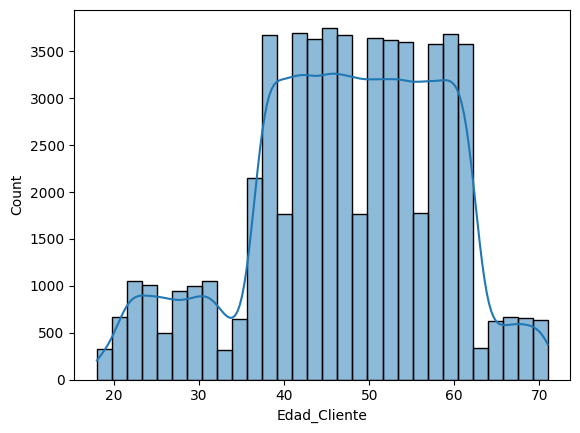

In [123]:
# Vamos a ver cuales son los numeros de la edad de los clientes 
sns.histplot(data["Edad_Cliente"], bins=30, kde=True)
plt.show()

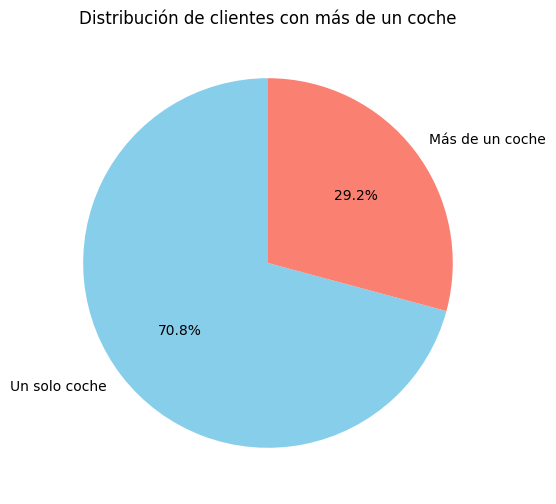

In [124]:
labels = ["Un solo coche", "Más de un coche"]

plt.figure(figsize=(6,6))
plt.pie(data["Mas_1_coche"].value_counts(), labels=labels, autopct="%1.1f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Distribución de clientes con más de un coche")
plt.show()

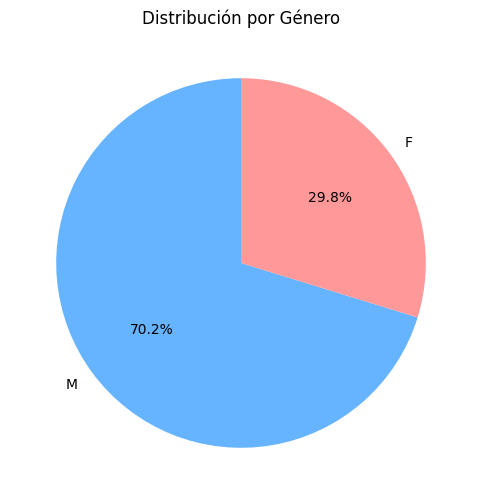

In [125]:
conteo_genero = data['GENERO'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo_genero, 
        labels=conteo_genero.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
plt.title("Distribución por Género")
plt.show()

## **Limpieza de datos.**

### Manejo de datos nulos y duplicados

In [126]:
data.isnull().sum()

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

In [127]:
moda_zona_renta = data['Zona_Renta'].mode()[0]
data['Zona_Renta'] = data['Zona_Renta'].fillna(moda_zona_renta)


In [128]:
data.dropna(subset=['ESTADO_CIVIL', 'GENERO', 'Averia_grave'], inplace=True)

In [129]:
data.shape

(57154, 23)

In [130]:
data.duplicated().sum()

np.int64(151)

In [131]:
data = data.drop_duplicates()
data.shape

(57003, 23)

### Codificación de variables categóricas y continuas

In [132]:
v_continuas = []
v_categoricas = []
for col in data.columns:
    if data[col].nunique() > 10 and data[col].dtypes in ['float64', 'int64']:
        v_continuas.append(col)
    else:
        v_categoricas.append(col)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: COSTE_VENTA, km_anno, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC, Mas_1_coche


#### **Categóricas**

In [133]:
data[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
CODE,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,False
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,False
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,True


In [134]:
data[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          4
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
Mas_1_coche         2
dtype: int64

In [135]:
data[v_categoricas].describe( include = 'all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
count,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003,57003
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,4,2,4,2,2
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO,False
freq,15819,22988,32383,39381,51975,29463,43384,40025,52218,10600,36740,50156,50126,29707,31285,29533,35728,40371


In [136]:
print('Valores únicos de las variables categóricas:')
for col in v_categoricas:
    print(f"- {col}: {data[col].unique()}")

Valores únicos de las variables categóricas:
- PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
- TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
- COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
- Potencia: ['Baja' 'Media' 'Alta']
- TRANS: ['M' 'A']
- FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
- ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']
- GENERO: ['M' 'F']
- OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
- PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'Palencia' 'Huelva'
 'Huesca' 'Zamora' 'Avil

##### **Agrupación de valores.**

In [137]:
# Diccionario de mapeo de provincias a comunidades en formato estructurado
comunidades_provincias = {
    "Andalucía": ["Almería", "Cádiz", "Córdoba", "Granada", "Huelva", "Jaén", "Málaga", "Sevilla"],
    "Aragón": ["Huesca", "Teruel", "Zaragoza"],
    "Asturias": ["Asturias"],
    "Islas Baleares": ["Baleares"],
    "Canarias": ["Las Palmas", "Santa Cruz de Tenerife"],
    "Cantabria": ["Cantabria"],
    "Castilla-La Mancha": ["Albacete", "Ciudad Real", "Cuenca", "Guadalajara", "Toledo"],
    "Castilla y León": ["Ávila", "Burgos", "León", "Palencia", "Salamanca", "Segovia", "Soria", "Valladolid", "Zamora"],
    "Cataluña": ["Barcelona", "Gerona", "Lerida", "Tarragona"],
    "Extremadura": ["Badajoz", "Cáceres"],
    "Galicia": ["La Coruña", "Lugo", "Orense", "Pontevedra"],
    "Madrid": ["Madrid"],
    "Murcia": ["Murcia"],
    "Navarra": ["Navarra"],
    "País Vasco": ["Álava", "Guipuzcua", "Vizcaya"],
    "La Rioja": ["La Rioja"],
    "Comunidad Valenciana": ["Alicante", "Castellon", "Valencia"],
    "Ceuta y Melilla": ["Ceuta", "Melilla"],
    "Extranjero": ["Francia"]
}

# Crear el diccionario de mapeo inverso (Provincia -> Comunidad)
provincia_a_comunidad = {provincia: comunidad for comunidad, provincias in comunidades_provincias.items() for provincia in provincias}

# Reemplazar la columna PROVINCIA por la Comunidad Autónoma
data["Comunidad"] = data["PROVINCIA"].map(provincia_a_comunidad)

# Eliminar la columna antigua de PROVINCIA si ya no la necesitas
data.drop(columns=["PROVINCIA"], inplace=True)

# Verificar si quedan valores sin asignar
faltantes = data[data["Comunidad"].isna()]["Comunidad"].count()
print(f"Provincias sin asignar: {faltantes}")

# Mostrar la lista de comunidades y sus provincias
for comunidad, provincias in comunidades_provincias.items():
    print(f"{comunidad}: {', '.join(provincias)}")


Provincias sin asignar: 0
Andalucía: Almería, Cádiz, Córdoba, Granada, Huelva, Jaén, Málaga, Sevilla
Aragón: Huesca, Teruel, Zaragoza
Asturias: Asturias
Islas Baleares: Baleares
Canarias: Las Palmas, Santa Cruz de Tenerife
Cantabria: Cantabria
Castilla-La Mancha: Albacete, Ciudad Real, Cuenca, Guadalajara, Toledo
Castilla y León: Ávila, Burgos, León, Palencia, Salamanca, Segovia, Soria, Valladolid, Zamora
Cataluña: Barcelona, Gerona, Lerida, Tarragona
Extremadura: Badajoz, Cáceres
Galicia: La Coruña, Lugo, Orense, Pontevedra
Madrid: Madrid
Murcia: Murcia
Navarra: Navarra
País Vasco: Álava, Guipuzcua, Vizcaya
La Rioja: La Rioja
Comunidad Valenciana: Alicante, Castellon, Valencia
Ceuta y Melilla: Ceuta, Melilla
Extranjero: Francia


##### **Label Encoder.**

In [138]:
columnas_categoricas = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'OcupaciOn', 'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 'QUEJA_CAC', 'GENERO', 'Comunidad'] # potencia deberia de ser ordinal? Zona renta
encoders = {}  # Diccionario para guardar los encoders

for col in columnas_categoricas:
    le = LabelEncoder()  # Crear un LabelEncoder por cada columna
    data[col] = le.fit_transform(data[col])  # Aplicarlo a la columna
    encoders[col] = le  # Guardarlo en el diccionario

data.head()


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,Campanna1,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo,Comunidad
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,Baja,1,0,0,1,1,1,...,0,Averia muy grave,1,2892,0,False,2,18,0,2
CLI2,0,0,0,Baja,1,0,0,0,1,0,...,1,No,0,1376,7187,False,2,53,0,6
CLI3,0,0,0,Baja,1,3,0,1,1,0,...,0,No,0,1376,0,True,4,21,3,7
CLI4,0,0,0,Baja,1,2,0,0,1,1,...,1,Averia muy grave,1,2015,7256,True,4,48,5,15
CLI5,0,0,0,Baja,1,2,0,0,2,1,...,0,No,0,1818,0,True,3,21,3,3


##### **Ordinal Encoder**


In [139]:
columnas_ordinales = ['Potencia', 'Zona_Renta', 'Averia_grave']
for col in columnas_ordinales:
    print(f'{col}: {data[col].unique()} ')

Potencia: ['Baja' 'Media' 'Alta'] 
Zona_Renta: ['Medio-Bajo' 'Medio' 'Alto' 'Otros'] 
Averia_grave: ['Averia muy grave' 'No' 'Averia leve' 'Averia grave'] 


In [140]:
# Definir el orden manualmente para cada columna
ordenes = {
    'Potencia': ['Baja', 'Media', 'Alta'],  # Ejemplo de niveles de potencia
    'Zona_Renta': ['Otros', 'Medio-Bajo', 'Medio', 'Alto' ],  # Orden definido por ti
    'Averia_grave': [ 'No', 'Averia leve', 'Averia grave', 'Averia muy grave']  # Si es ordinal, puedes definir el orden como deseesbinaria, 'No' puede ser 0 y 'Sí' 1
}

# Crear el OrdinalEncoder con el orden especificado
ordinal_encoder = OrdinalEncoder(categories=[ordenes[col] for col in columnas_ordinales])

# Aplicar la transformación
data[columnas_ordinales] = ordinal_encoder.fit_transform(data[columnas_ordinales])

# Verificar resultado
data[columnas_ordinales].head()

,Potencia,Zona_Renta,Averia_grave
CODE,,,
CLI1,0.0,1.0,3.0
CLI2,0.0,1.0,0.0
CLI3,0.0,2.0,0.0
CLI4,0.0,2.0,3.0
CLI5,0.0,3.0,0.0


#### **Continuas**


In [141]:
def outliers_IQR(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Contar valores atípicos
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        # Eliminar outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df, outliers

In [142]:
data, outliers_detectados = outliers_IQR(data, v_continuas)
print("Valores atípicos detectados:")
for col, count in outliers_detectados.items():
    print(f"- {col}: {count}")

Valores atípicos detectados:
- COSTE_VENTA: 38
- km_anno: 59
- Revisiones: 0
- Edad_Cliente: 0
- Tiempo: 0


In [143]:
data.shape[0] # Filas tras eliminar outliers.

56906

In [144]:
data.to_csv('data/processed/IA_PROPENSITY_TRAIN.csv', index=True)

## **Modelos de clasificación**

#### **Random Forest**

In [145]:
TARGET = "Mas_1_coche"  # Nombre de la variable objetivo
FEATURES = [col for col in data.columns if col != TARGET and col != "CODE" and col != "Tiempo"] 

X = data[FEATURES]
y = data[TARGET]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [211]:
# Definir hiperparámetros a iterar
param_grid = {
    'n_estimators': [500],
    'max_depth': [7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None],
    'max_leaf_nodes': [None],
    'warm_start': [False, True],
    'criterion': ['entropy']
}

In [ ]:
warnings.filterwarnings("ignore")

# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    (
        n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features,
        bootstrap, class_weight, max_leaf_nodes, warm_start, criterion
    ) = params

    # Construir el modelo con los hiperparámetros actuales
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        max_leaf_nodes=max_leaf_nodes,
        warm_start=warm_start,
        criterion=criterion,
        random_state=42,
        n_jobs=-1  # Usa todos los núcleos disponibles para acelerar
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'precision': precision,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# Visualizar los mejores modelos
from IPython.display import display
display(best_models)

# Matriz de confusión y Curvas ROC/Precision-Recall del mejor modelo
best_model_params = best_models.iloc[0].to_dict()
best_model = RandomForestClassifier(
    n_estimators=best_model_params["n_estimators"],
    max_depth=best_model_params["max_depth"],
    min_samples_split=best_model_params["min_samples_split"],
    min_samples_leaf=best_model_params["min_samples_leaf"],
    criterion=best_model_params["criterion"],
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Matriz de Confusión
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - {best_model_params["criterion"]}')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC - {best_model_params["criterion"]}')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Curva Precision-Recall - {best_model_params["criterion"]}')
plt.legend()
plt.show()

#### **ADABoost**

In [ ]:
# Definir hiperparámetros a iterar
param_grid = {
    'n_estimators': [400],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]
}

,n_estimators,learning_rate,estimator_depth,accuracy,f1_score,recall,roc_auc,precision,cv_score,train_score,overfitting
5,400,1.0,3,0.825138,0.819546,0.825138,0.901893,0.819462,0.820025,0.828417,OK
3,400,0.1,3,0.805767,0.790655,0.805767,0.875564,0.800044,0.799908,0.801069,OK
4,400,1.0,1,0.785257,0.768475,0.785257,0.845896,0.774922,0.780712,0.781983,OK


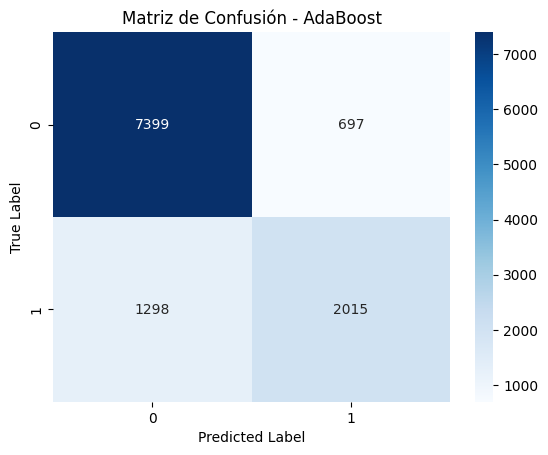

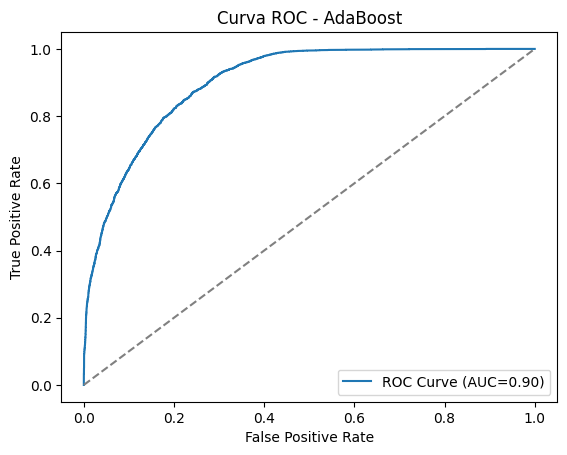

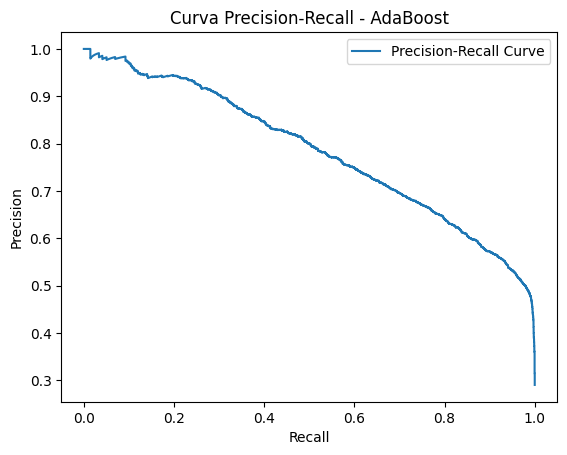

In [ ]:
# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    (n_estimators, learning_rate, estimator) = params
    
    # Construir el modelo
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        estimator=estimator,  # <--- Cambio aquí
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else None
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Train Score
    train_score = model.score(X_train, y_train)
    
    # Evaluar sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"
    
    # Guardar resultados
    results.append({
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'estimator_depth': estimator.max_depth,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'precision': precision,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Convertir resultados a DataFrame y seleccionar los mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar los mejores modelos sin sobreajuste
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

display(best_models)

# Entrenar el mejor modelo y visualizar métricas
best_model_params = best_models.iloc[0].to_dict()
best_model = AdaBoostClassifier(
    n_estimators=best_model_params['n_estimators'],
    learning_rate=best_model_params['learning_rate'],
    estimator=DecisionTreeClassifier(max_depth=best_model_params['estimator_depth']),  # <--- Cambio aquí
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Matriz de Confusión
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - AdaBoost')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - AdaBoost')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - AdaBoost')
plt.legend()
plt.show()


#### **Gradient Boosting**


,criterion,max_depth,min_samples_split,min_samples_leaf,n_estimators,accuracy,f1_score,recall,roc_auc,precision,cv_score,train_score,overfitting
0,friedman_mse,5,2,1,500,0.850118,0.84637,0.850118,0.926539,0.846347,0.84253,0.904479,OK


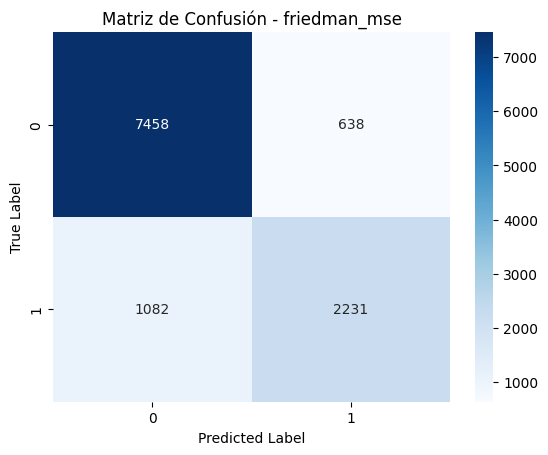

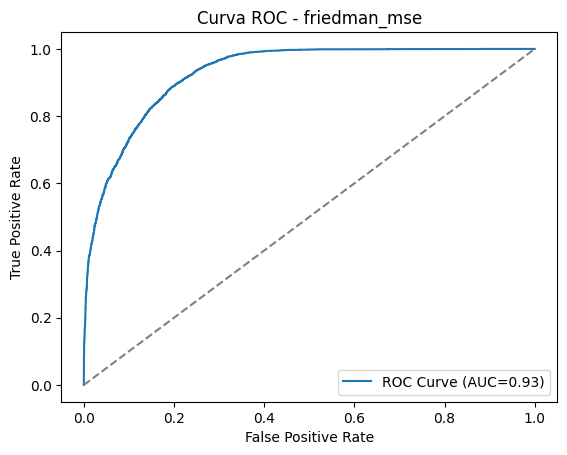

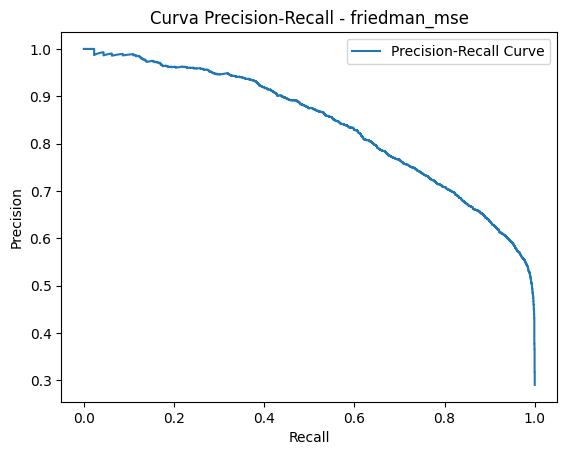

In [ ]:
warnings.filterwarnings("ignore")

# Definir variables
TARGET = "Mas_1_coche"  # Nombre de la variable objetivo
FEATURES = [col for col in data.columns if col != TARGET and col != "CODE" and col != "Tiempo"]

X = data[FEATURES]
y = data[TARGET]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'n_estimators': [500],  # Reducir el número de árboles
    'max_depth': [5, 7],  # Limitar la profundidad máxima
    'min_samples_split': [2],  # Reducir el número de combinaciones
    'min_samples_leaf': [1],  # Limitar las combinaciones de hojas
    'subsample': [0.7],  # Usar solo el 70% del conjunto de datos
    'criterion': ['friedman_mse'],  # Un solo criterio
}
    

# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    (
        n_estimators, max_depth, min_samples_split, min_samples_leaf,
        subsample, criterion
    ) = params

    # Construir el modelo con los hiperparámetros actuales
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        criterion=criterion,
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=3)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'precision': precision,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# Visualizar los mejores modelos
from IPython.display import display
display(best_models)

# Matriz de confusión y Curvas ROC/Precision-Recall del mejor modelo
best_model_params = best_models.iloc[0].to_dict()
best_model = GradientBoostingClassifier(
    n_estimators=best_model_params["n_estimators"],
    max_depth=best_model_params["max_depth"],
    min_samples_split=best_model_params["min_samples_split"],
    min_samples_leaf=best_model_params["min_samples_leaf"],
    criterion=best_model_params["criterion"],
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Matriz de Confusión
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - {best_model_params["criterion"]}')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC - {best_model_params["criterion"]}')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Curva Precision-Recall - {best_model_params["criterion"]}')
plt.legend()
plt.show()


#### XGBoost


In [147]:
# Calcular el ratio de desbalanceo para scale_pos_weight
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Definir hiperparámetros a iterar
param_grid = {
    'n_estimators': [500],  
    'max_depth': [3, 5],  
    'learning_rate': [0.05, 0.1],  
    'subsample': [0.7],  
    'colsample_bytree': [0.8],  
    'lambda': [1]  
}

# Almacenar resultados
results = []

# Iterar sobre combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    (
        n_estimators, max_depth, learning_rate, 
        subsample, colsample_bytree, reg_lambda
    ) = params

    # Construir el modelo con los hiperparámetros actuales
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_lambda=reg_lambda,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",  # Cambia a 'gpu_hist' si tienes CUDA
        random_state=42,
        scale_pos_weight=scale_pos_weight  # Manejo del desbalance de clases
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Convertir las probabilidades a predicciones binarias
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else None

    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=3)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Evaluar sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar resultados
    results.append({
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'precision': precision,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

In [148]:
results_df.to_csv('models/results_xgboost.csv', index=False)

In [149]:
# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# Visualizar los mejores modelos
from IPython.display import display
display(best_models)

,max_depth,learning_rate,n_estimators,accuracy,f1_score,recall,roc_auc,precision,cv_score,train_score,overfitting
3,5,0.10,500,0.809700,0.815858,0.809700,0.906934,0.834389,0.811879,0.860557,OK
2,5,0.05,500,0.802144,0.809289,0.802144,0.905948,0.833550,0.808013,0.831891,OK
1,3,0.10,500,0.796257,0.803730,0.796257,0.896378,0.829048,0.798041,0.810188,OK


In [150]:
# Obtener los hiperparámetros del mejor modelo
best_model_params = best_models.iloc[0].to_dict()
best_model = XGBClassifier(
    n_estimators=best_model_params["n_estimators"],
    max_depth=best_model_params["max_depth"],
    learning_rate=best_model_params["learning_rate"],
    subsample=0.7,
    colsample_bytree=0.8,
    reg_lambda=1,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    scale_pos_weight=scale_pos_weight  # Manejo del desbalance de clases
)

# Entrenar el mejor modelo
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [151]:
# Predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

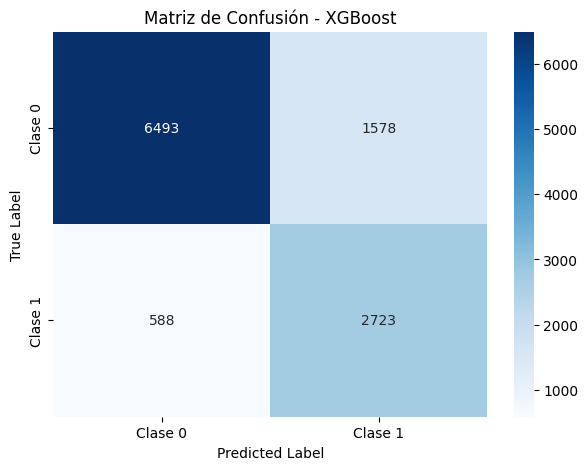

In [152]:
# Matriz de Confusión
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - XGBoost')
plt.show()

In [153]:
# Reporte de clasificación mejorado
print("\nClassification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))
print("=" * 60)


Classification Report:
              precision    recall  f1-score   support

     Clase 0       0.92      0.80      0.86      8071
     Clase 1       0.63      0.82      0.72      3311

    accuracy                           0.81     11382
   macro avg       0.78      0.81      0.79     11382
weighted avg       0.83      0.81      0.82     11382



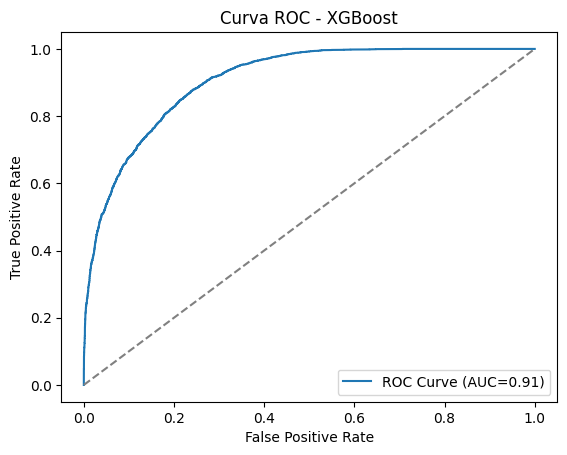

In [154]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.show()

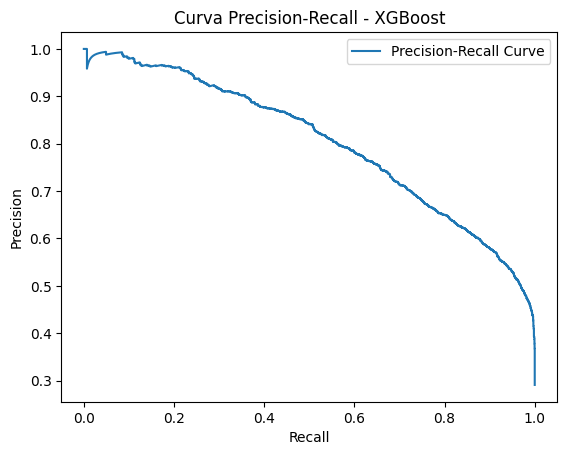

In [155]:
# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - XGBoost')
plt.legend()
plt.show()

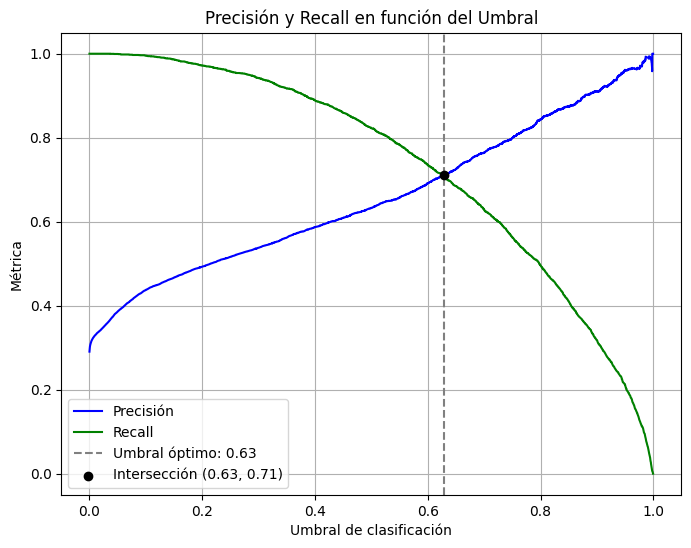

In [156]:
# Obtener probabilidades del modelo.
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calcular precision, recall y umbrales.
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Encontrar el punto de intersección entre precisión y recall.
diff = np.abs(precision - recall)
min_diff_idx = np.argmin(diff)
optimal_threshold = thresholds[min_diff_idx]
optimal_value = precision[min_diff_idx]

# Graficar Precision-Recall vs Umbral.
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precisión", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='green')
plt.axvline(x=optimal_threshold, linestyle="--", color="gray", label=f"Umbral óptimo: {optimal_threshold:.2f}")
plt.scatter(optimal_threshold, optimal_value, color="black", label=f"Intersección ({optimal_threshold:.2f}, {optimal_value:.2f})", zorder = 5)
plt.xlabel("Umbral de clasificación")
plt.ylabel("Métrica")
plt.grid(True)
plt.legend()
plt.title("Precisión y Recall en función del Umbral")
plt.show()

In [157]:
nuevo_umbral = 0.59
y_pred_new = (best_model.predict_proba(X_test)[:, 1] >= nuevo_umbral).astype(int)

# Matriz de confusión con el nuevo umbral
conf_mat = confusion_matrix(y_test, y_pred_new)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_new))


Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.86      0.87      8071
        True       0.68      0.75      0.71      3311

    accuracy                           0.83     11382
   macro avg       0.79      0.80      0.79     11382
weighted avg       0.83      0.83      0.83     11382



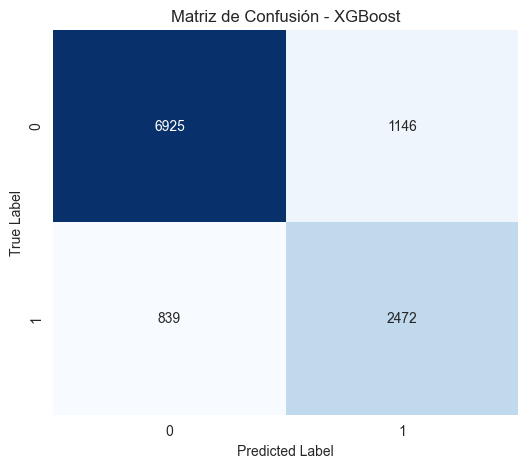

In [177]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - XGBoost')
plt.show()

In [159]:
# Guardar el modelo en un archivo .pkl
model_filename = "models/xgboost.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

## **Aplicación del modelo a un nuevo conjunto de datos.**

In [167]:
data = pd.read_csv("data/processed/IA_PROPENSITY_INPUT.csv", index_col=0)

In [168]:
modelo = joblib.load("models/xgboost.pkl")

In [169]:
# Aplicar el modelo a los datos corregidos
y_pred_proba = modelo.predict_proba(data)[:, 1]  

# Agregar la probabilidad al DataFrame original (sin eliminar CODE)
data["Propension_Compra"] = y_pred_proba
data["Predicción_Compra"] = (y_pred_proba >= 0.59).astype(int)

In [170]:
data.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,Campanna1,...,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Comunidad,Propension_Compra,Predicción_Compra
CODE,,,,,,,,,,,,,,,,,,,,,
CLIX1,0,0,0,0.0,1,3,0,1,1,1,...,0,0.0,0,2892,0,1,20,18,0.948093,1
CLIX2,0,0,0,0.0,1,3,3,1,1,1,...,1,1.0,0,2892,17967,1,55,11,0.937396,1
CLIX3,0,0,0,0.0,1,0,3,0,1,0,...,0,2.0,0,1376,0,1,18,6,0.020590,0
CLIX4,0,0,0,0.0,1,0,0,0,1,0,...,1,0.0,0,2594,6219,1,37,9,0.693739,1
CLIX5,0,0,0,0.0,1,3,0,0,1,1,...,0,3.0,1,1376,0,1,21,7,0.315523,0


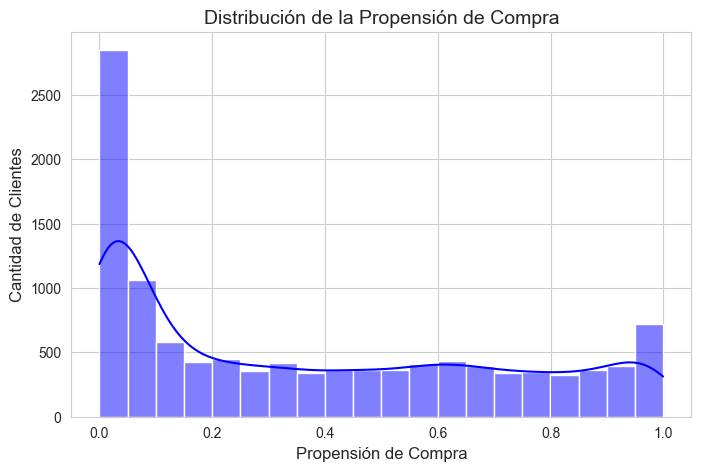

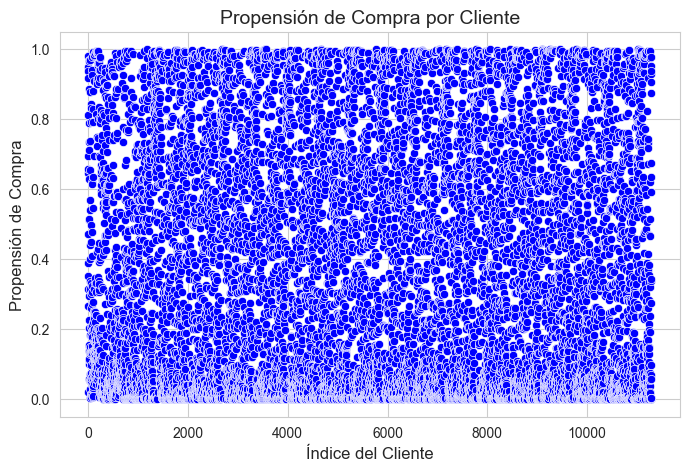

In [ ]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# 📊 1️⃣ Histograma: Distribución de la Propensión de Compra
plt.figure(figsize=(8,5))
sns.histplot(data["Propension_Compra"], bins=20, kde=True, color="blue")
plt.title("Distribución de la Propensión de Compra", fontsize=14)
plt.xlabel("Propensión de Compra", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 📊 2️⃣ Scatter Plot: Propensión de Compra por Cliente
plt.figure(figsize=(8,5))
sns.scatterplot(x=range(len(data)), y=data["Propension_Compra"], color="blue")
plt.title("Propensión de Compra por Cliente", fontsize=14)
plt.xlabel("Índice del Cliente", fontsize=12)
plt.ylabel("Propensión de Compra", fontsize=12)
plt.show()

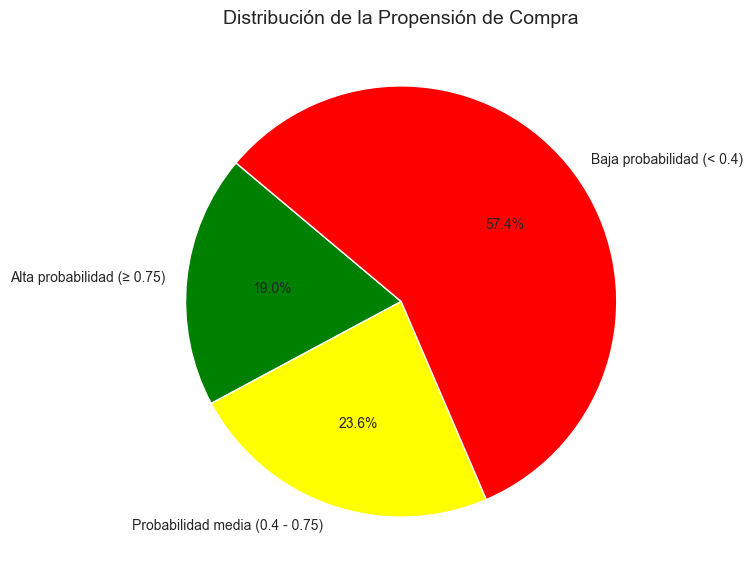

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Cargar datos
data = pd.read_csv("data/processed/IA_PROPENSITY_INPUT.csv", index_col=0)

# Cargar modelo y hacer predicciones
modelo = joblib.load("models/xgboost.pkl")
y_pred_proba = modelo.predict_proba(data)[:, 1]

# Agregar la probabilidad de compra al DataFrame
data["Propension_Compra"] = y_pred_proba

# Definir categorías
alta_probabilidad = data["Propension_Compra"] >= 0.75
probabilidad_media = (data["Propension_Compra"] >= 0.4) & (data["Propension_Compra"] < 0.75)
baja_probabilidad = data["Propension_Compra"] < 0.4

# Calcular porcentajes
total = len(data)
porcentajes = {
    "Alta probabilidad (≥ 0.75)": alta_probabilidad.sum() / total * 100,
    "Probabilidad media (0.4 - 0.75)": probabilidad_media.sum() / total * 100,
    "Baja probabilidad (< 0.4)": baja_probabilidad.sum() / total * 100,
}

# Crear gráfico de pastel
plt.figure(figsize=(7, 7))
colors = ["green", "yellow", "red"]
plt.pie(porcentajes.values(), labels=porcentajes.keys(), autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Distribución de la Propensión de Compra", fontsize=14)
plt.show()
